# 특성공학
## 차원축소
### 주성분분석-유방암

- tSNE 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn import feature_selection
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cancer = load_breast_cancer()
X_all = cancer.data
y = cancer.target
sc = StandardScaler()
X_all = sc.fit_transform(X_all)

In [3]:
X_all.shape

(569, 30)

In [4]:
X_all[:3]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## 30개의 특성을 모두 사용하는 경우

In [6]:
rfc = RandomForestClassifier(n_estimators=200)

In [18]:
## 교차검증
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True)
cross_val_score(rfc, X_all, y, cv=cv).mean().round(4)

0.9631

## 6개의 특성만 사용하는 경우

In [19]:
fs = SelectPercentile(feature_selection.chi2, percentile = 80)
X_P = fs.fit_transform(cancer.data, y)
cancer.feature_names[fs.get_support()]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'mean symmetry', 'radius error', 'perimeter error', 'area error',
       'compactness error', 'concavity error', 'concave points error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry',
       'worst fractal dimension'], dtype='<U23')

In [20]:
fs.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [21]:
cross_val_score(rfc, X_P, y).mean().round(4)

0.9578

## 2개의 특성만 사용하는 경우

In [11]:
fs = SelectPercentile(feature_selection.chi2, percentile = 6)
X_P = fs.fit_transform(cancer.data, y)
cancer.feature_names[fs.get_support()]

array(['mean area', 'worst area'], dtype='<U23')

In [12]:
cancer.data.shape, X_P.shape

((569, 30), (569, 2))

In [13]:
cross_val_score(rfc, X_P, y).mean().round(4)

0.9191

## 특성 선택을 4, 20 개인 경우 성능 비교
-  for문을 사용할 수 있음

## PCA로 두개의 차원만 사용하는 경우

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_all)

In [23]:
pca_result.shape

(569, 2)

In [24]:
pca_result[:3]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ]])

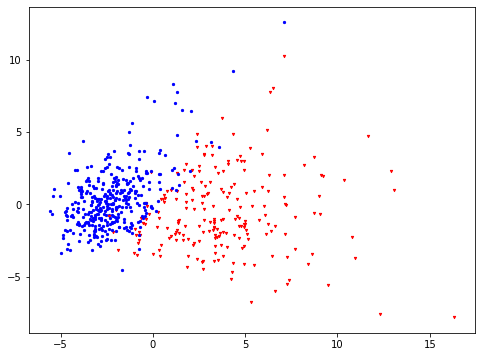

In [25]:
m = ['v', 'o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i],pca_result[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

In [26]:
pca.components_.round(3)

array([[ 0.219,  0.104,  0.228,  0.221,  0.143,  0.239,  0.258,  0.261,
         0.138,  0.064,  0.206,  0.017,  0.211,  0.203,  0.015,  0.17 ,
         0.154,  0.183,  0.042,  0.103,  0.228,  0.104,  0.237,  0.225,
         0.128,  0.21 ,  0.229,  0.251,  0.123,  0.132],
       [-0.234, -0.06 , -0.215, -0.231,  0.186,  0.152,  0.06 , -0.035,
         0.19 ,  0.367, -0.106,  0.09 , -0.089, -0.152,  0.204,  0.233,
         0.197,  0.13 ,  0.184,  0.28 , -0.22 , -0.045, -0.2  , -0.219,
         0.172,  0.144,  0.098, -0.008,  0.142,  0.275]])

## 2개의 주성분만 사용하여 분류를 수행

In [27]:
cross_val_score(rfc, pca_result, y, cv=5).mean().round(4)

0.9315

## 6개의 주성분만 사용하여 분류를 수행

In [29]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_all)
cross_val_score(rfc, pca_result, y, cv=5).mean().round(4)

0.9403

## tSNE 시각화

In [32]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(cancer.data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.614876
[t-SNE] KL divergence after 1000 iterations: 0.218163


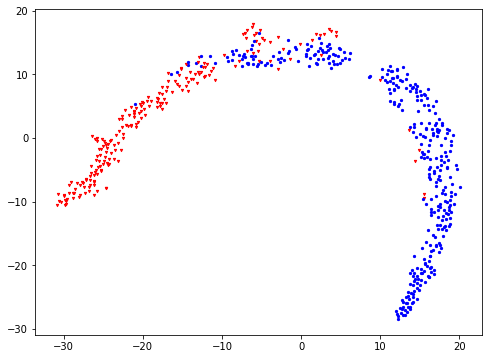

In [33]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()

### 표준화 후 시각화

In [22]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X_all)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.328308
[t-SNE] KL divergence after 1000 iterations: 0.902193


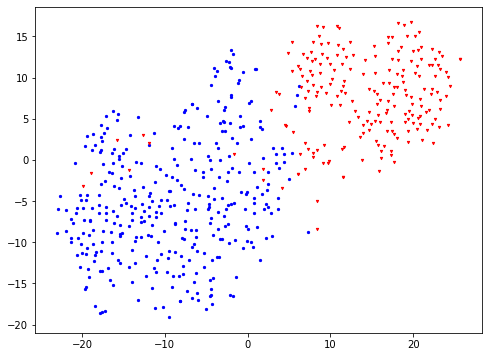

In [23]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_results[:,0][i],tsne_results[:,1][i], marker=m[y[i]], c=c[y[i]], s=5)
plt.show()